# ImDb Movies Reviews Dataset from Kaggle - sentiment analysis

In [1]:
import glob

files_train_neg = glob.glob('train/neg/*.txt')
files_train_pos = glob.glob('train/pos/*.txt')
files_train = files_train_neg + files_train_pos

files_test_neg = glob.glob('test/neg/*.txt') 
files_test_pos = glob.glob('test/pos/*.txt')
files_test = files_test_neg + files_test_pos

In [2]:
len(files_test_neg)

12500

## 1. Doc2Vec

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.utils import shuffle

In [4]:
def doc2vec(vectorizer):
    
    X_train = vectorizer.fit_transform(files_train)
    y_train = [0]*len(files_train_neg) + [1]*len(files_train_pos)
    X_train, y_train = shuffle(X_train, y_train)
    
    X_test = vectorizer.transform(files_test)
    y_test = [0]*len(files_test_neg) + [1]*len(files_test_pos)
    X_test, y_test = shuffle(X_test, y_test)
    
    return X_train, y_train, X_test, y_test

In [5]:
vectorizer1 = CountVectorizer(input='filename')
X_train1, y_train1, X_test1, y_test1 = doc2vec(vectorizer1)

In [6]:
len(y_test1)

25000

In [7]:
vectorizer2 = CountVectorizer(input='filename', stop_words='english')
X_train2, y_train2, X_test2, y_test2 = doc2vec(vectorizer2)

In [8]:
vectorizer3 = TfidfVectorizer(input='filename')
X_train3, y_train3, X_test3, y_test3 = doc2vec(vectorizer3)

In [9]:
vectorizer4 = TfidfVectorizer(input='filename', stop_words='english')
X_train4, y_train4, X_test4, y_test4 = doc2vec(vectorizer4)

## 2. Classifiers:

#### 2.1 Naive Bayes (Multinomial)

In [10]:
from sklearn.naive_bayes import MultinomialNB

In [11]:
# 1 count vectorizer, keeping stopwords
clf_multi_nb1 = MultinomialNB()
clf_multi_nb1.fit(X_train1, y_train1)
clf_multi_nb1.score(X_test1, y_test1)

0.81356

In [12]:
# 2 count vectorizer, removing stopwords
clf_multi_nb2 = MultinomialNB()
clf_multi_nb2.fit(X_train2, y_train2)
clf_multi_nb2.score(X_test2, y_test2)

0.81968

In [13]:
# 3 tfidf vectorizer, keeping stopwords
clf_multi_nb3 = MultinomialNB()
clf_multi_nb3.fit(X_train3, y_train3)
clf_multi_nb3.score(X_test3, y_test3)

0.82956

In [14]:
# 4 tfidf vectorizer, removing stopwords
clf_multi_nb4 = MultinomialNB()
clf_multi_nb4.fit(X_train4, y_train4)
clf_multi_nb4.score(X_test4, y_test4)

0.82992

In [15]:
# tfidf vectorizer, removing stopwords + grid search
from sklearn.model_selection import GridSearchCV
params = {'alpha' : [0.01, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'fit_prior' : [True, False]}
clf_multinb_best = GridSearchCV(MultinomialNB(), params)
clf_multinb_best.fit(X_train4, y_train4)
clf_multinb_best.score(X_test4, y_test4)
print(clf_multinb_best.best_params_)
print(clf_multinb_best.score(X_test4, y_test4))

{'alpha': 0.8, 'fit_prior': True}
0.82756


Additional grid search did not help to improve the model

#### 2.2 Naive Bayes (Bernoulli)

In [16]:
from sklearn.naive_bayes import BernoulliNB

In [17]:
# 1 count vectorizer, keeping stopwords
clf_bern_nb1 = BernoulliNB()
clf_bern_nb1.fit(X_train1, y_train1)
clf_bern_nb1.score(X_test1, y_test1)

0.82596

In [18]:
# 2 count vectorizer, removing stopwords
clf_bern_nb2 = BernoulliNB()
clf_bern_nb2.fit(X_train2, y_train2)
clf_bern_nb2.score(X_test2, y_test2)

0.8154

In [19]:
# 3 tfidf vectorizer, keeping stopwords
clf_bern_nb3 = BernoulliNB()
clf_bern_nb3.fit(X_train3, y_train3)
clf_bern_nb3.score(X_test3, y_test3)

0.82596

In [20]:
# 4 tfidf vectorizer, removing stopwords
clf_bern_nb4 = BernoulliNB()
clf_bern_nb4.fit(X_train4, y_train4)
clf_bern_nb4.score(X_test4, y_test4)

0.8154

In [21]:
# tfidf vectorizer, removing stopwords + grid search
from sklearn.model_selection import GridSearchCV
params = {'alpha' : [0.01, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          'fit_prior' : [True, False]}
clf_bern_best = GridSearchCV(BernoulliNB(), params)
clf_bern_best.fit(X_train4, y_train4)
clf_bern_best.score(X_test4, y_test4)
print(clf_bern_best.best_params_)
print(clf_bern_best.score(X_test4, y_test4))

{'alpha': 0.6, 'fit_prior': True}
0.81332


Additional grid search did not help to improve the model

#### 2.3 Rocchio

In [22]:
from sklearn.neighbors import NearestCentroid

In [23]:
# 1 count vectorizer, keeping stopwords
clf_rocchio1 = NearestCentroid()
clf_rocchio1.fit(X_train1, y_train1)
clf_rocchio1.score(X_test1, y_test1)

0.55048

In [24]:
# 2 count vectorizer, removing stopwords
clf_rocchio2 = NearestCentroid()
clf_rocchio2.fit(X_train2, y_train2)
clf_rocchio2.score(X_test2, y_test2)

0.63248

In [25]:
# 3 tfidf vectorizer, keeping stopwords
clf_rocchio3 = NearestCentroid()
clf_rocchio3.fit(X_train3, y_train3)
clf_rocchio3.score(X_test3, y_test3)

0.76196

In [26]:
# 4 tfidf vectorizer, removing stopwords
clf_rocchio4 = NearestCentroid()
clf_rocchio4.fit(X_train4, y_train4)
clf_rocchio4.score(X_test4, y_test4)

0.77224

In [27]:
# 5 tfidf vectorizer, removing stopwords + grid search
import warnings
warnings.filterwarnings('ignore')
params = {'metric' : ['euclidean', 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']}
clf_rocchio_best = GridSearchCV(NearestCentroid(), params)
clf_rocchio_best.fit(X_train4, y_train4)
clf_rocchio_best.score(X_test4, y_test4)
print(clf_rocchio_best.best_params_)
print(clf_rocchio_best.score(X_test4, y_test4))

{'metric': 'cosine'}
0.82004


Model with best parameters from a given grid search stands at 0.82004 accuracy (around 4.7% improvement from previous best).

#### 2.4 kNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors' : [23, 25, 27, 29, 31],
          'metric' : ['cosine', 'euclidean'],
          'weights' : ['uniform', 'distance']
         }
clf_knn_best = GridSearchCV(KNeighborsClassifier(), params, n_jobs = -1)
clf_knn_best.fit(X_train4, y_train4)
print(clf_knn_best.best_params_)
print(clf_knn_best.score(X_test4, y_test4))

{'metric': 'cosine', 'n_neighbors': 29, 'weights': 'distance'}
0.70488


#### 2.5 SVM

In [30]:
from sklearn.svm import LinearSVC
params = {'C' : [0.001, 0.01, 0.1, 1, 10]}
clf_linsvm_best = GridSearchCV(LinearSVC(), params, n_jobs = -1)
clf_linsvm_best.fit(X_train4, y_train4)
print(clf_linsvm_best.best_params_)
print(clf_linsvm_best.score(X_test4, y_test4))

{'C': 0.1}
0.87984


In [31]:
# takes alot of time to compute
# from sklearn.svm import SVC
# params = {'kernel' : ['poly', 'sigmoid'],
#           'C' : [0.001, 0.01, 0.1, 1, 10]
#          }
# clf_svm_best = GridSearchCV(SVC(), params, n_jobs = -1)
# clf_svm_best.fit(X_train4, y_train4)
# print(clf_svm_best.best_params_)
# print(clf_svm_best.score(X_test4, y_test4))

## 3. Metrics

#### detailed metrics for top models:

In [32]:
import matplotlib.pyplot as plt  
from sklearn.metrics import plot_confusion_matrix, classification_report

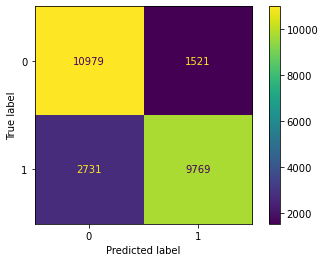

Multinomial Naive Bayes on tfidf vectorized data (no stop words)
               precision    recall  f1-score   support

           0       0.80      0.88      0.84     12500
           1       0.87      0.78      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [33]:
plot_confusion_matrix(clf_multi_nb4, X_test4, y_test4)  
plt.show()
y_pred = clf_multi_nb4.predict(X_test4)
print('Multinomial Naive Bayes on tfidf vectorized data (no stop words)\n',
      classification_report(y_test4, y_pred))

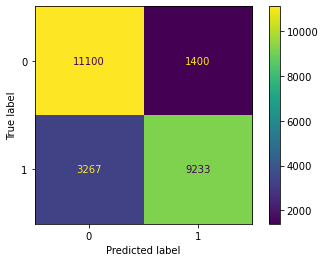

Bernoulli Naive Bayes on tfidf vectorized data (no stop words)
               precision    recall  f1-score   support

           0       0.80      0.88      0.84     12500
           1       0.87      0.78      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



In [34]:
plot_confusion_matrix(clf_bern_best, X_test4, y_test4)  
plt.show()
y_pred = clf_multi_nb4.predict(X_test4)
print('Bernoulli Naive Bayes on tfidf vectorized data (no stop words)\n',
      classification_report(y_test4, y_pred))

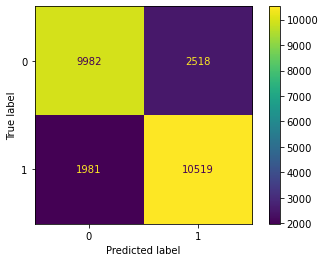

Rocchio on tfidf vectorized data (no stop words)
               precision    recall  f1-score   support

           0       0.83      0.80      0.82     12500
           1       0.81      0.84      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



In [35]:
plot_confusion_matrix(clf_rocchio_best, X_test4, y_test4)  
plt.show()
y_pred = clf_rocchio_best.predict(X_test4)
print('Rocchio on tfidf vectorized data (no stop words)\n',
      classification_report(y_test4, y_pred))

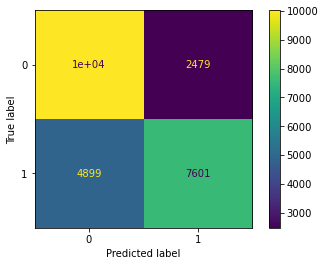

kNN on tfidf vectorized data (no stop words)
               precision    recall  f1-score   support

           0       0.67      0.80      0.73     12500
           1       0.75      0.61      0.67     12500

    accuracy                           0.70     25000
   macro avg       0.71      0.70      0.70     25000
weighted avg       0.71      0.70      0.70     25000



In [36]:
plot_confusion_matrix(clf_knn_best, X_test4, y_test4)  
plt.show()
y_pred = clf_knn_best.predict(X_test4)
print('kNN on tfidf vectorized data (no stop words)\n',
      classification_report(y_test4, y_pred))

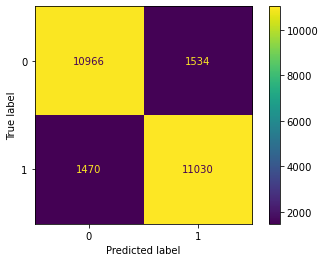

SVM on tfidf vectorized data (no stop words)
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [37]:
plot_confusion_matrix(clf_linsvm_best, X_test4, y_test4)  
plt.show()
y_pred = clf_linsvm_best.predict(X_test4)
print('SVM on tfidf vectorized data (no stop words)\n',
      classification_report(y_test4, y_pred))

## 4. LSA dim reduction

In [38]:
#to do, porownac modele + miary jakosci

In [39]:
from sklearn.decomposition import TruncatedSVD
lsa = TruncatedSVD(n_components = 500)
X_train_lsa4 = lsa.fit_transform(X_train4)
X_test_lsa4 = lsa.transform(X_test4)
X_train_lsa4.shape

(25000, 500)

0.7728


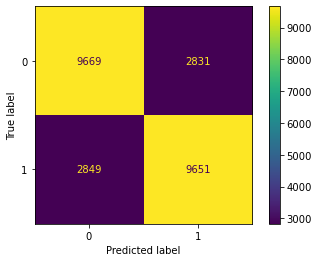

Bernoulli Naive Bayes on tfidf vectorized, dim reduced data (no stop words)
               precision    recall  f1-score   support

           0       0.77      0.77      0.77     12500
           1       0.77      0.77      0.77     12500

    accuracy                           0.77     25000
   macro avg       0.77      0.77      0.77     25000
weighted avg       0.77      0.77      0.77     25000



In [40]:
clf_bern_nb_lsa = BernoulliNB(alpha=0.4, fit_prior=True)
clf_bern_nb_lsa.fit(X_train_lsa4, y_train4)
print(clf_bern_nb_lsa.score(X_test_lsa4, y_test4))

plot_confusion_matrix(clf_bern_nb_lsa, X_test_lsa4, y_test4)  
plt.show()
y_pred = clf_bern_nb_lsa.predict(X_test_lsa4)
print('Bernoulli Naive Bayes on tfidf vectorized, dim reduced data (no stop words)\n',
      classification_report(y_test4, y_pred))

Accuracy went down after dimensionality reduction from 0.83 to 0.77.

0.81744


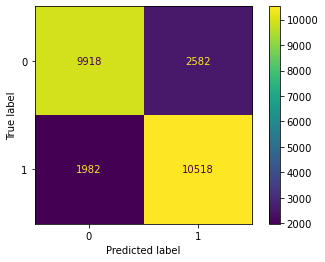

Rocchio on tfidf vectorized, dim reduced data (no stop words)
               precision    recall  f1-score   support

           0       0.83      0.79      0.81     12500
           1       0.80      0.84      0.82     12500

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000



In [41]:
clf_rocchio_lsa = NearestCentroid(metric='cosine')
clf_rocchio_lsa.fit(X_train_lsa4, y_train4)
print(clf_rocchio_lsa.score(X_test_lsa4, y_test4))

plot_confusion_matrix(clf_rocchio_lsa, X_test_lsa4, y_test4)  
plt.show()
y_pred = clf_rocchio_lsa.predict(X_test_lsa4)
print('Rocchio on tfidf vectorized, dim reduced data (no stop words)\n',
      classification_report(y_test4, y_pred))

Accuracy did not change after dimensionality reduction 0.82 before and after reduction.

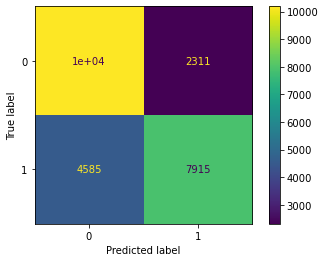

kNN with tfidf vectorized, dim reduced data (no stop words)
               precision    recall  f1-score   support

           0       0.69      0.82      0.75     12500
           1       0.77      0.63      0.70     12500

    accuracy                           0.72     25000
   macro avg       0.73      0.72      0.72     25000
weighted avg       0.73      0.72      0.72     25000



In [42]:
clf_knn_lsa = KNeighborsClassifier(metric='cosine', n_neighbors=27, weights='distance')
clf_knn_lsa.fit(X_train_lsa4, y_train4)
clf_knn_lsa.score(X_test_lsa4, y_test4)

plot_confusion_matrix(clf_knn_lsa, X_test_lsa4, y_test4)  
plt.show()
y_pred = clf_knn_lsa.predict(X_test_lsa4)
print('kNN with tfidf vectorized, dim reduced data (no stop words)\n',
      classification_report(y_test4, y_pred))

Accuracy went up from 0.70 to 0.72 after dim reduction.

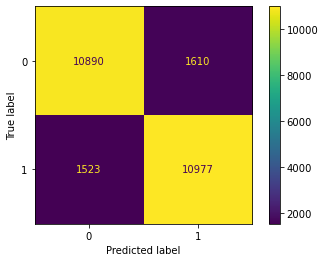

SVM with tfidf vectorized, dim reduced data (no stop words)
               precision    recall  f1-score   support

           0       0.88      0.87      0.87     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



In [43]:
clf_svm_lsa = LinearSVC(C=1)
clf_svm_lsa.fit(X_train_lsa4, y_train4)
clf_svm_lsa.score(X_test_lsa4, y_test4)

plot_confusion_matrix(clf_svm_lsa, X_test_lsa4, y_test4)  
plt.show()
y_pred = clf_svm_lsa.predict(X_test_lsa4)
print('SVM with tfidf vectorized, dim reduced data (no stop words)\n',
      classification_report(y_test4, y_pred))

Accuracy did not change after dim reduction.

## 5. Sentiment analysis

Dave et al. Mining the Peanut Gallery. Opinion Extraction and Semantic Classification of Product Reviews (2003)

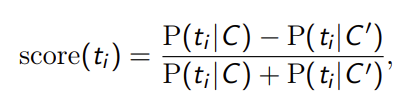

In [44]:
import glob

files_train_neg = glob.glob('train/neg/*.txt')
files_train_pos = glob.glob('train/pos/*.txt')
files_train = files_train_neg + files_train_pos

files_test_neg = glob.glob('test/neg/*.txt') 
files_test_pos = glob.glob('test/pos/*.txt')
files_test = files_test_neg + files_test_pos

In [47]:
# creating separate vectorizer for positive and negative sentiments
vectorizer_sa_positive = CountVectorizer(input='filename')
X_train_positive = vectorizer_sa_positive.fit_transform(files_train_pos)
words_positive = vectorizer_sa_positive.get_feature_names()
counts_positive = X_train_positive.toarray().sum(axis=0)
word_counts_positive = dict(zip(words_positive, counts_positive))
n_terms_positive = X_train_positive.shape[1]

vectorizer_sa_negative = CountVectorizer(input='filename')
X_train_negative = vectorizer_sa_negative.fit_transform(files_train_neg)
words_negative = vectorizer_sa_negative.get_feature_names()
counts_negative = X_train_negative.toarray().sum(axis=0)
word_counts_negative = dict(zip(words_negative, counts_negative))
n_terms_negative = X_train_negative.shape[1]

In [60]:
def get_term_score(term):
    # returns score of the term
    try:
        PtCpos = word_counts_positive[term]/n_terms_positive
        PtCneg = word_counts_negative[term]/n_terms_negative
        return (PtCpos - PtCneg) / (PtCpos + PtCneg)
    except:
        return 0
    
predictions = []
for file in files_test:
    with open(file, encoding='utf8') as f:
        words = []
        for line in f:
            words.extend(line.strip().split(' '))
        words = [w.lower() for w in words if w != '']
        scores = [get_term_score(term) for term in words]
        prediction = 1 if sum(scores) > 0 else 0
        predictions.append(prediction)

In [61]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(y_true=y_test4, y_pred=predictions)

array([[6877, 5623],
       [6835, 5665]], dtype=int64)

As we can see the claasifier does not make a good job at classifying new objects. Perhaps its the case for unigrams only. Next step is trying classifier on bigrams.

In [56]:
#sample score of just one word 'not' in positive class
word_counts_positive['not']/n_terms_positive

0.2560684619386785

In [57]:
#sample score of just one word 'not' in negative class
word_counts_negative['not']/n_terms_negative

0.30154282870361837

In [64]:
vectorizer_sa_positive = CountVectorizer(ngram_range=(2, 2), input='filename')
X_train_positive = vectorizer_sa_positive.fit_transform(files_train_pos)
words_positive = vectorizer_sa_positive.get_feature_names()
counts_positive = X_train_positive.toarray().sum(axis=0)
word_counts_positive = dict(zip(words_positive, counts_positive))
n_terms_positive = X_train_positive.shape[1]

vectorizer_sa_negative = CountVectorizer(ngram_range=(2, 2), input='filename')
X_train_negative = vectorizer_sa_negative.fit_transform(files_train_neg)
words_negative = vectorizer_sa_negative.get_feature_names()
counts_negative = X_train_negative.toarray().sum(axis=0)
word_counts_negative = dict(zip(words_negative, counts_negative))
n_terms_negative = X_train_negative.shape[1]

MemoryError: Unable to allocate 80.9 GiB for an array with shape (12500, 868998) and data type int64

The data exceeded memory for n grams.

## 6. Top tokens for Multinomial and SVM:

#### Multinomial NB:

In [65]:
import numpy as np
def show_top50(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.feature_log_prob_[i])[-50:]
        print("%s: %s" % (category, " ".join(feature_names[top10])))

In [66]:
show_top50(clf_multi_nb4, vectorizer4, [0, 1])

0: director awful going pretty want doesn waste does actually scene script minutes horror little scenes funny end actors films didn character say thing ve know watching characters way seen did think better worst watch people make story movies plot acting time don really good like just bad film movie br
1: saw better old scenes scene lot young cast makes say excellent family ve acting world end series real funny does did make know 10 years man character little don characters way films seen watch think movies life people best love really time just story like good great film movie br


#### SVM:

In [67]:
clf_svm = LinearSVC(C=1)
clf_svm.fit(X_train4, y_train4)
clf_svm.score(X_test4, y_test4)

y_pred = clf_svm.predict(X_test4)

In [68]:
#getting most common words separately from test class negative and class positive
files_predicted_positive=[]
files_predicted_negative=[]
for f, p in zip(files_test, y_pred):
    if p==0:
        files_predicted_positive.append(f)
    elif p==1:
        files_predicted_negative.append(f)

In [69]:
vectorizer_positive = CountVectorizer(input='filename', stop_words='english')
vectorizer_negative = CountVectorizer(input='filename', stop_words='english')

In [70]:
X_positive = vectorizer_positive.fit_transform(files_predicted_positive)
X_negative = vectorizer_negative.fit_transform(files_predicted_negative)

In [71]:
from collections import Counter

words_pos = vectorizer_positive.get_feature_names()
counts_positive = X_positive.toarray().sum(axis=0)
wc_positive = Counter(dict(zip(words_pos, counts_positive)))

words_neg = vectorizer_negative.get_feature_names()
counts_negative = X_negative.toarray().sum(axis=0)
wc_negative = Counter(dict(zip(words_pos, counts_negative)))

In [73]:
wc_negative.most_common(50)

[('borrowing', 49043),
 ('misunderstanding', 21373),
 ('feeney', 19244),
 ('lavant', 9475),
 ('jcdv', 8493),
 ('gila', 7203),
 ('tbor', 6029),
 ('spokesperson', 5461),
 ('pushes', 5456),
 ('awing', 4456),
 ('goering', 4445),
 ('palpatine', 4335),
 ('divined', 4270),
 ('lovestory', 3834),
 ('versus', 3731),
 ('mithi', 3691),
 ('ch', 3638),
 ('cervantes', 3446),
 ('fellatio', 3442),
 ('takahiro', 3366),
 ('venues', 3349),
 ('saratoga', 3257),
 ('likewise', 3193),
 ('persuasive', 3161),
 ('deus', 3098),
 ('latvia', 3057),
 ('katherine', 3035),
 ('achtung', 3030),
 ('belongings', 3013),
 ('legitimately', 2928),
 ('luico', 2837),
 ('benefactor', 2799),
 ('rubell', 2794),
 ('distantness', 2714),
 ('rotflol', 2694),
 ('emaciated', 2643),
 ('rubin', 2570),
 ('unforgivably', 2446),
 ('purposes', 2310),
 ('taiwan', 2227),
 ('acme', 2218),
 ('diehard', 2178),
 ('verbatim', 2174),
 ('acoustic', 2095),
 ('whitman', 2089),
 ('devalued', 2085),
 ('freakishly', 2082),
 ('10', 2070),
 ('distaste', 2067

In [72]:
wc_positive.most_common(50)

[('br', 51037),
 ('movie', 22551),
 ('film', 20302),
 ('like', 10416),
 ('just', 8917),
 ('good', 7403),
 ('time', 6354),
 ('really', 5900),
 ('story', 5670),
 ('bad', 4709),
 ('great', 4639),
 ('people', 4566),
 ('don', 4505),
 ('make', 4040),
 ('movies', 3950),
 ('way', 3888),
 ('think', 3674),
 ('characters', 3659),
 ('watch', 3624),
 ('seen', 3437),
 ('character', 3435),
 ('films', 3424),
 ('love', 3362),
 ('acting', 3343),
 ('know', 3308),
 ('plot', 3237),
 ('did', 3229),
 ('life', 3228),
 ('best', 3183),
 ('little', 3069),
 ('man', 3007),
 ('does', 2973),
 ('better', 2891),
 ('end', 2827),
 ('scene', 2791),
 ('scenes', 2699),
 ('say', 2680),
 ('ve', 2592),
 ('thing', 2421),
 ('funny', 2386),
 ('watching', 2385),
 ('real', 2384),
 ('didn', 2344),
 ('doesn', 2258),
 ('actors', 2245),
 ('look', 2194),
 ('10', 2193),
 ('director', 2185),
 ('work', 2164),
 ('old', 2162)]

# 7. Clustering documents

In [74]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, random_state = 10)
km.fit(X_train4)

KMeans(n_clusters=2, random_state=10)

In [75]:
import pandas as pd

In [76]:
y_pred = km.predict(X_train4)
pd.Series(y_pred).value_counts().sort_index()

0     9330
1    15670
dtype: int64

In [77]:
correct=0
for y, y_hat in zip(y_train4, y_pred):
    if y == y_hat:
        correct+=1

In [78]:
accuracy = correct / len(y_pred)
accuracy

0.52312

# 8. Opinion Lexicon

In [79]:
from nltk.corpus import opinion_lexicon